In [153]:
import pandas as pd
import scipy
import pyreadstat
import pyshs
import matplotlib.pyplot as plt
import seaborn as sns
import prince
import numpy as np

In [154]:
pd.set_option('display.max_columns', None)

In [155]:
data = pd.read_excel(r"C:\Users\rana_\OneDrive\Bureau\inserm\travaux\Leem_2020_2021\transfer_6262507_files_792d0717\LEEM - 2021-2020\LEEM_2022\transfer_6340865_files_2bffa310\LEEM 2022\BDD Grand Public.xlsx")

In [156]:
data

,Sexe,Age,Statut,CSP,Catégorie d'agglomération,Région UDA9,Revenus du foyer,Niveau de diplôme,L1 (Du pétrole),L1 (De la grande distribution),L1 (Des télécommunications du numérique ),L1 (De l’agro-alimentaire),L1 (Du médicament),L1 (De la banque et de l’assurance),L1 (Du bâtiment et des travaux publics),L1 (De l’automobile),L1 (Du nucléaire),L1 (De l’aéronautique et aérospatial),L1 (De la chimie),L2,L3 (Pour la santé de la population française),L3 (Pour l’économie et la souveraineté sanitaire d,L4,L5,L6,L7,L8 (Fournissent des médicaments de qualité et efficaces),L8 (Contribuent fortement aux progrès et avancées dans le traitement des maladies),L8 (Contribuent à l’autonomie sanitaire de la France ),L8 (Jouent un rôle important dans l’augmentation de l’espérance et la qualité de vie des patients ),L8 (Sont indispensables au bon fonctionnement du système de santé),L8 (Contribuent à la croissance économique de la France),L8 (Sont une source importante d’emplois en France ),L8 (Sont un secteur stratégique essentiel pour la France ),L8 (Participent à l’animation du tissu économique dans les territoires et les régions ),L8 (Emploient des collaborateurs (et collaboratrices) compétent(e)s ),L8 (Luttent efficacement contre les pénuries de médicaments ),L8 (Agissent pour que les médicaments innovants soient plus rapidement disponibles ),L8 (Œuvrent à l’intérêt général),L8 (Facilitent l’accès du plus grand nombre aux médicaments ),L8 (Sont attentives à leur impact sur l’environnement ),L8 (Agissent de manière éthique et intègre ),L8 (Agissent de manière transparente ),L8 (Placent les patients au cœur de leurs priorités ),"L8 (Laissent les professionnels de santé libres dans leurs prescriptions, sans chercher à les influencer )",L8 (Proposent des médicaments à des prix justes et adaptés ),L9,L10,L11
0,Une femme,25-34 ans,Salarié du secteur privé,Employé,100 000 hab et plus,Est,De 1 500 à 1 999 euros,"CAP, BEP",Plutôt confiance,Tout à fait confiance,Plutôt pas confiance,Plutôt pas confiance,Plutôt pas confiance,Plutôt confiance,Plutôt pas confiance,Tout à fait confiance,Plutôt confiance,Plutôt confiance,Plutôt confiance,Très utiles,Oui,Oui,Plutôt confiance,Plutôt pas confiance,"Oui, probablement",NaN,"Non, plutôt pas","Non, plutôt pas","Non, plutôt pas","Non, plutôt pas","Non, plutôt pas","Non, pas du tout","Non, pas du tout","Non, plutôt pas","Non, pas du tout","Non, pas du tout","Non, plutôt pas","Non, plutôt pas","Non, plutôt pas","Non, plutôt pas","Oui, plutôt","Non, pas du tout","Non, plutôt pas","Non, plutôt pas",Vous ne savez pas,"Non, pas du tout",Non probablement pas,Assez facile,Assez dépendantes
1,Une femme,18-24 ans,Salarié du secteur privé,Employé,Agglomération parisienne,Région Parisienne,De 4 500 à 5 999 euros,BAC+2,Tout à fait confiance,Plutôt confiance,Plutôt confiance,Plutôt confiance,Plutôt confiance,Plutôt confiance,Plutôt confiance,Plutôt confiance,Plutôt confiance,Plutôt confiance,Plutôt confiance,Plutôt utiles,Oui,Oui,Plutôt confiance,Plutôt confiance,"Oui, probablement",NaN,"Oui, plutôt","Oui, plutôt","Oui, plutôt","Oui, plutôt","Oui, plutôt","Oui, plutôt","Non, plutôt pas","Oui, plutôt","Oui, plutôt","Oui, plutôt","Non, plutôt pas","Oui, plutôt","Oui, plutôt","Oui, plutôt","Oui, plutôt","Oui, plutôt",Vous ne savez pas,"Oui, plutôt",Vous ne savez pas,"Oui, plutôt",Non probablement pas,Très facile,Assez dépendantes
2,Un homme,35-49 ans,Salarié du secteur privé,Ouvrier,Rural,Ouest,Vous ne savez pas / refus / ne veut pas dire,"CAP, BEP",Plutôt confiance,Plutôt confiance,Plutôt confiance,Plutôt confiance,Plutôt confiance,Plutôt confiance,Plutôt confiance,Plutôt confiance,Plutôt confiance,Plutôt confiance,Plutôt confiance,Plutôt utiles,Oui,Oui,Plutôt confiance,Pas du tout confiance,"Oui, probablement",NaN,"Non, plutôt pas","Oui, plutôt","Oui, plutôt","Oui, tout à fait","Oui, tout à fait","Oui, plutôt",NaN,"Non, plutôt pas","Non, plutôt pas","Oui, plutôt","Non, plutôt pas","Non, pas du tout","Oui, plutôt","Non, plutôt pas"

In [157]:
list_indeps = ['Sexe', 'Age', 'Région', 'Agglomération', 'Statut', 'CSP', 'Diplôme', 'Revenus_cat'
              , 'L1_médicament', 'L2', 'L4', 'L5', 'L6', 'L8_1', 'L8_2', 'L8_3', 'L8_4', 'L8_5', 'L8_6', 'L8_7', 'L8_8', 'L8_9']

questions_variables = {'Sexe' : "Sexe", 'Age' : "Groupe d'ages", 'Région' : "Région", 'Agglomération' : "Agglomération"
                      , 'Statut' : "Emploi", 'CSP' : "CSP", 'Diplôme' : "Niveau de scolarité le plus élevé", 'Revenus_cat' : "Revenus du foyer"
                      , 'L1_médicament' : "Diriez-vous que vous avez confiance dans les entreprises du secteur : Du médicament?"
                      , 'L2' : "Diriez-vous que les entreprises du médicament sont extrêmement utiles, très utiles, plutôt utiles, plutôt pas utiles ou pas du tout utiles à la société ?"
                      , 'L4' : "Faites-vous tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance aux médicaments ?"
                      , 'L5' : "Faites-vous tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance aux vaccins ?"
                      , 'L6' : "Vous personnellement, si votre médecin ou les autorités de santé le recommandaient, vous feriez-vous vacciner ? (Par exemple, contre la grippe, contre le Covid avec la nouvelle dose du vaccin, ou contre les infections à pneumocoques ou à papillomavirus …)"
                      , 'L8_1' : "Pouvez-vous dire si les affirmations suivantes correspondent à l’image que vous avez des entreprises du médicament ? Pour vous, les entreprises du médicament…Fournissent des médicaments de qualité et efficaces"
                      , 'L8_2' : "Pouvez-vous dire si les affirmations suivantes correspondent à l’image que vous avez des entreprises du médicament ? Pour vous, les entreprises du médicament…Contribuent fortement aux progrès et avancées dans le traitement des maladies"
                      , 'L8_3' : "Pouvez-vous dire si les affirmations suivantes correspondent à l’image que vous avez des entreprises du médicament ? Pour vous, les entreprises du médicament…Jouent un rôle important dans l’augmentation de l’espérance et la qualité de vie des patients"
                      , 'L8_4' : "Pouvez-vous dire si les affirmations suivantes correspondent à l’image que vous avez des entreprises du médicament ? Pour vous, les entreprises du médicament…Sont indispensables au bon fonctionnement du système de santé"
                      , 'L8_5' : "Et pensez-vous que les entreprises du médicament… ? Œuvrent à l’intérêt général"
                      , 'L8_6' : "Et pensez-vous que les entreprises du médicament… ? Facilitent l’accès du plus grand nombre aux médicaments"
                      , 'L8_7' : "Et pensez-vous que les entreprises du médicament… ? Agissent de manière éthique et intègre"
                      , 'L8_8' : "Et pensez-vous que les entreprises du médicament… ? Placent les patients au cœur de leurs priorités"
                      , 'L8_9' : "Et pensez-vous que les entreprises du médicament… ? Laissent les professionnels de santé libres dans leurs prescriptions, sans chercher à les influencer"}

In [158]:
# Variable 'Sexe'
# Question : Sexe
data['Sexe'].value_counts()

Sexe
Un homme     505
Une femme    499
Name: count, dtype: int64

In [159]:
data['Sexe'] = data['Sexe'].astype('category')
data['Sexe'] = pd.Categorical(data['Sexe'], 
                            categories=['Une femme', 'Un homme'], 
                            ordered=True)

In [160]:
# Variable 'Age'
# Question : Groupe d'ages
data['Age'].value_counts()

Age
65 ans et +    254
50-64 ans      249
35-49 ans      239
25-34 ans      151
18-24 ans      111
Name: count, dtype: int64

In [161]:
data['Age'] = data['Age'].astype('category')
data['Age'] = pd.Categorical(data['Age'], 
                            categories=['18-24 ans'
                                        , '25-34 ans'
                                        , '35-49 ans'
                                       , '50-64 ans'
                                       , '65 ans et +'], 
                            ordered=True)

In [162]:
# Variable 'Région UDA9'
# Question : "Région"
data['Région UDA9'].value_counts()

Région UDA9
Région Parisienne        191
Ouest                    140
Méditerranée             126
Sud Ouest                121
Sud Est                  111
Bassin Parisien Ouest     93
Est                       92
Bassin Parisien Est       67
Nord                      63
Name: count, dtype: int64

In [163]:
# Variable 'Catégorie d'agglomération'
# Question : Agglomération
data["Catégorie d'agglomération"].value_counts()

Catégorie d'agglomération
100 000 hab et plus         278
Rural                       224
Moins de 20 000 hab         192
Agglomération parisienne    164
De 20 000 à 99 999 hab      146
Name: count, dtype: int64

In [164]:
data["Catégorie d'agglomération"] = data["Catégorie d'agglomération"].astype('category')
data["Catégorie d'agglomération"] = pd.Categorical(data["Catégorie d'agglomération"], 
                            categories=['Rural'
                                        , 'Moins de 20 000 hab'
                                        , 'De 20 000 à 99 999 hab'
                                       , '100 000 hab et plus'
                                       , 'Agglomération parisienne'], 
                            ordered=True)

In [165]:
# Les variables 'HHSIZE' et 'MAR' n'existent pas
# Variable 'Statut'
# Question : "Emploi"
data['Statut'].value_counts()

Statut
Salarié du secteur privé                              421
Inactif (retraité, élève, étudiant, autre inactif)    341
Salarié du secteur public                             141
Inscrit à pôle emploi                                  53
A votre compte                                         48
Name: count, dtype: int64

In [166]:
data['Statut'] = data['Statut'].astype('category')

In [167]:
# Variable 'CSP'
# Question : "CSP"
data['CSP'].value_counts()

CSP
Retraité                                         261
Employé                                          180
Profession intermédiaire                         153
Ouvrier                                          126
Cadre et profession intellectuelle supérieure    103
Autre inactif                                     80
Elève / étudiant                                  53
Agriculteur, indépendant, chef d'entreprise       48
Name: count, dtype: int64

In [168]:
data['CSP'] = data['CSP'].astype('category')

In [169]:
# Variable 'Niveau de diplôme'
# Question : "Niveau de scolarité le plus élevé"
data['Niveau de diplôme'].value_counts()

Niveau de diplôme
CAP, BEP                                   379
BAC+3 et plus                              187
BAC, brevet professionnel ou équivalent    165
BAC+2                                      115
Brevet des collèges                        102
Aucun diplôme                               56
Name: count, dtype: int64

In [170]:
data['Niveau de diplôme'] = data['Niveau de diplôme'].astype('category')
data['Niveau de diplôme'] = pd.Categorical(data['Niveau de diplôme'], 
                            categories=['Aucun diplôme'
                                        , 'Brevet des collèges'
                                        , 'CAP, BEP'
                                        , 'BAC, brevet professionnel ou équivalent'
                                        , 'BAC+2'
                                        , 'BAC+3 et plus'], 
                            ordered=True)                  

In [171]:
# Variable 'Revenus du foyer'
# Question : Revenus du foyer
data['Revenus du foyer'].value_counts()

Revenus du foyer
De 2 000 à 2 499 euros                          140
De 1 500 à 1 999 euros                          125
De 1000 à 1 499 euros                           122
De 3 500 à 4 499 euros                          121
De 2 500 à 2 999 euros                          110
Vous ne savez pas / refus / ne veut pas dire    102
De 3 000 à 3 499 euros                          102
De 4 500 à 5 999 euros                           67
De 750 à 999 euros                               31
Moins de 499 euros                               28
De 500 à 749 euros                               22
De 6 000 à 7 499 euros                           19
De plus de 7 500 euros                           15
Name: count, dtype: int64

In [172]:
data['Revenus_cat'] = data['Revenus du foyer'].apply(lambda x : x.replace("Moins de 499 euros", "Moins de 1000 euros").
                                        replace("De 500 à 749 euros","Moins de 1000 euros").
                                        replace("De 750 à 999 euros","Moins de 1000 euros").
                                        replace("De 1000 à 1 499 euros","De 1000 à 1 499 euros").
                                        replace("De 1 500 à 1 999 euros", "De 1 500 à 1 999 euros").
                                        replace("De 2 000 à 2 499 euros","De 2 000 à 2 499 euros" ).
                                        replace("De 2 500 à 2 999 euros", "De 2 500 à 2 999 euros").
                                        replace("De 3 000 à 3 499 euros", "De 3 000 à 3 499 euros").
                                        replace("De 3 500 à 4 499 euros", "De 3 500 à 4 499 euros").
                                        replace("De 4 500 à 5 999 euros", "4500 euros et plus").
                                        replace("De 6 000 à 7 499 euros", "4500 euros et plus").
                                        replace("De plus de 7 500 euros", "4500 euros et plus").
                                        replace("Vous ne savez pas / refus / ne veut pas dire", "Vous ne savez pas / refus / ne veut pas dire")
                                        )

In [173]:
data['Revenus_cat'].value_counts()

Revenus_cat
De 2 000 à 2 499 euros                          140
De 1 500 à 1 999 euros                          125
De 1000 à 1 499 euros                           122
De 3 500 à 4 499 euros                          121
De 2 500 à 2 999 euros                          110
Vous ne savez pas / refus / ne veut pas dire    102
De 3 000 à 3 499 euros                          102
4500 euros et plus                              101
Moins de 1000 euros                              81
Name: count, dtype: int64

In [174]:
#changer l'order des categories de la variable 'Revenus_cat'
data['Revenus_cat'] = pd.Categorical(data['Revenus_cat'], 
                            categories=['Moins de 1000 euros', 'De 1000 à 1 499 euros' ,'De 1 500 à 1 999 euros'
                                        ,'De 2 000 à 2 499 euros', 'De 2 500 à 2 999 euros'
                                        , 'De 3 000 à 3 499 euros', 'De 3 500 à 4 499 euros'
                                       , '4500 euros et plus', 'Vous ne savez pas / refus / ne veut pas dire'], 
                            ordered=True)

In [175]:
# Variable 'L1 (Du médicament)'
# Question : Diriez-vous que vous avez confiance dans les entreprises du secteur : Du médicament?
data['L1 (Du médicament)'].value_counts()

L1 (Du médicament)
Plutôt confiance         530
Plutôt pas confiance     269
Tout à fait confiance    105
Pas du tout confiance     94
Name: count, dtype: int64

In [176]:
data['L1 (Du médicament)'].isna().sum()

6

In [177]:
data['L1 (Du médicament)'].fillna("Pas de réponse", inplace = True)

In [178]:
#changer l'order des categories
data['L1 (Du médicament)'] = pd.Categorical(data['L1 (Du médicament)'], 
                            categories=['Pas du tout confiance'
                                        , 'Plutôt pas confiance'
                                        , 'Plutôt confiance'
                                       , 'Tout à fait confiance'
                                       , 'Pas de réponse'], 
                            ordered=True)

In [179]:
data['L1 (Du médicament)'].isna().sum()

0

In [180]:
# Variable 'L2'
# Question : Diriez-vous que les entreprises du médicament sont extrêmement utiles, très utiles, plutôt utiles, plutôt pas utiles ou pas du tout utiles à la société ?
data['L2'].value_counts()

L2
Plutôt utiles         359
Très utiles           352
Extrêmement utiles    233
Plutôt pas utiles      25
Vous ne savez pas      24
Pas du tout utiles     11
Name: count, dtype: int64

In [181]:
#changer l'order des categories
data['L2'] = pd.Categorical(data['L2'], 
                            categories=['Pas du tout utiles'
                                        , 'Plutôt pas utiles'
                                        , 'Plutôt utiles'
                                       , 'Très utiles'
                                       , 'Extrêmement utiles'
                                       , 'Vous ne savez pas'], 
                            ordered=True)

In [182]:
# Variable 'L4'
# Question : Faites-vous tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance aux médicaments ?
data['L4'].value_counts()

L4
Plutôt confiance         664
Tout à fait confiance    152
Plutôt pas confiance     142
Pas du tout confiance     44
Name: count, dtype: int64

In [183]:
data['L4'].isna().sum()

2

In [184]:
data['L4'].fillna("Pas de réponse", inplace = True)

In [185]:
# Variable 'L5'
# Question : Faites-vous tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance aux vaccins ?
data['L5'].value_counts()

L5
Plutôt confiance         563
Tout à fait confiance    174
Plutôt pas confiance     162
Pas du tout confiance     78
Name: count, dtype: int64

In [186]:
data['L5'].isna().sum()

27

In [187]:
data['L5'].fillna("Pas de réponse", inplace = True)

In [188]:
data[['L4', 'L5']] = data[['L4', 'L5']].astype('category')

In [189]:
ItemsL4_L5 = ['L4', 'L5']

In [190]:
for i in data[ItemsL4_L5].columns:
    data[i] = pd.Categorical(data[i], 
                            categories=['Pas du tout confiance'
                                        , 'Plutôt pas confiance'
                                        , 'Plutôt confiance'
                                       , 'Tout à fait confiance'
                                       , 'Pas de réponse'], 
                            ordered=True)

In [191]:
# Variable 'L6'
# Question : Vous personnellement, si votre médecin ou les autorités de santé le recommandaient, vous feriez-vous vacciner ? (Par exemple, contre la grippe, contre le Covid avec la nouvelle dose du vaccin, ou contre les infections à pneumocoques ou à papillomavirus …) 
data['L6'].value_counts()

L6
Oui, probablement        402
Oui, certainement        337
Non, probablement pas    171
Non, certainement pas     91
Name: count, dtype: int64

In [192]:
data['L6'].isna().sum()

3

In [193]:
data['L6'].fillna("Pas de réponse", inplace = True)

In [194]:
#changer l'order des categories
data['L6'] = pd.Categorical(data['L6'], 
                            categories=['Non, certainement pas'
                                        , 'Non, probablement pas'
                                        , 'Oui, probablement'
                                       , 'Oui, certainement'
                                       , 'Pas de réponse'], 
                            ordered=True)

In [195]:
# Variable 'L8 (Fournissent des médicaments de qualité et efficaces)'
# Question : Pouvez-vous dire si les affirmations suivantes correspondent à l’image que vous avez des entreprises du médicament ? Pour vous, les entreprises du médicament…Fournissent des médicaments de qualité et efficaces 
data['L8 (Fournissent des médicaments de qualité et efficaces)'].value_counts()

L8 (Fournissent des médicaments de qualité et efficaces)
Oui, plutôt          651
Oui, tout à fait     156
Non, plutôt pas      115
Vous ne savez pas     56
Non, pas du tout      24
Name: count, dtype: int64

In [197]:
data['L8 (Fournissent des médicaments de qualité et efficaces)'].fillna("Pas de réponse", inplace = True)

In [198]:
data['L8 (Fournissent des médicaments de qualité et efficaces)'].isna().sum()

0

In [199]:
# Variable 'L8 (Contribuent fortement aux progrès et avancées dans le traitement des maladies)'
# Question : Pouvez-vous dire si les affirmations suivantes correspondent à l’image que vous avez des entreprises du médicament ? Pour vous, les entreprises du médicament…Contribuent fortement aux progrès et avancées dans le traitement des maladies  
data['L8 (Contribuent fortement aux progrès et avancées dans le traitement des maladies)'].value_counts()

L8 (Contribuent fortement aux progrès et avancées dans le traitement des maladies)
Oui, plutôt          591
Oui, tout à fait     240
Non, plutôt pas      101
Vous ne savez pas     47
Non, pas du tout      24
Name: count, dtype: int64

In [200]:
data['L8 (Contribuent fortement aux progrès et avancées dans le traitement des maladies)'].isna().sum()

1

In [201]:
data['L8 (Contribuent fortement aux progrès et avancées dans le traitement des maladies)'].fillna("Pas de réponse", inplace = True)

In [202]:
# Variable 'L8 (Jouent un rôle important dans l’augmentation de l’espérance et la qualité de vie des patients )'
# Question : Pouvez-vous dire si les affirmations suivantes correspondent à l’image que vous avez des entreprises du médicament ? Pour vous, les entreprises du médicament…Jouent un rôle important dans l’augmentation de l’espérance et la qualité de vie des patients  
data['L8 (Jouent un rôle important dans l’augmentation de l’espérance et la qualité de vie des patients )'].value_counts()

L8 (Jouent un rôle important dans l’augmentation de l’espérance et la qualité de vie des patients )
Oui, plutôt          587
Oui, tout à fait     235
Non, plutôt pas      100
Vous ne savez pas     45
Non, pas du tout      36
Name: count, dtype: int64

In [203]:
data['L8 (Jouent un rôle important dans l’augmentation de l’espérance et la qualité de vie des patients )'].isna().sum()

1

In [204]:
data['L8 (Jouent un rôle important dans l’augmentation de l’espérance et la qualité de vie des patients )'].fillna("Pas de réponse", inplace = True)

In [205]:
# Variable 'L8 (Sont indispensables au bon fonctionnement du système de santé)'
# Question : Pouvez-vous dire si les affirmations suivantes correspondent à l’image que vous avez des entreprises du médicament ? Pour vous, les entreprises du médicament…Sont indispensables au bon fonctionnement du système de santé
data['L8 (Sont indispensables au bon fonctionnement du système de santé)'].value_counts()

L8 (Sont indispensables au bon fonctionnement du système de santé)
Oui, plutôt          571
Oui, tout à fait     251
Non, plutôt pas      109
Vous ne savez pas     43
Non, pas du tout      28
Name: count, dtype: int64

In [206]:
data['L8 (Sont indispensables au bon fonctionnement du système de santé)'].isna().sum()

2

In [207]:
data['L8 (Sont indispensables au bon fonctionnement du système de santé)'].fillna("Pas de réponse", inplace = True)

In [208]:
# Variable 'L8 (Œuvrent à l’intérêt général)'
# Question : Et pensez-vous que les entreprises du médicament… ? Œuvrent à l’intérêt général
data['L8 (Œuvrent à l’intérêt général)'].value_counts()

L8 (Œuvrent à l’intérêt général)
Oui, plutôt          456
Non, plutôt pas      235
Oui, tout à fait     138
Non, pas du tout      97
Vous ne savez pas     76
Name: count, dtype: int64

In [209]:
data['L8 (Œuvrent à l’intérêt général)'].isna().sum()

2

In [210]:
data['L8 (Œuvrent à l’intérêt général)'].fillna("Pas de réponse", inplace = True)

In [211]:
# Variable 'L8 (Facilitent l’accès du plus grand nombre aux médicaments )'
# Question : Et pensez-vous que les entreprises du médicament… ? Facilitent l’accès du plus grand nombre aux médicaments 
data['L8 (Facilitent l’accès du plus grand nombre aux médicaments )'].value_counts()

L8 (Facilitent l’accès du plus grand nombre aux médicaments )
Oui, plutôt          487
Non, plutôt pas      241
Oui, tout à fait     131
Non, pas du tout      76
Vous ne savez pas     66
Name: count, dtype: int64

In [212]:
data['L8 (Facilitent l’accès du plus grand nombre aux médicaments )'].isna().sum()

3

In [213]:
data['L8 (Facilitent l’accès du plus grand nombre aux médicaments )'].fillna("Pas de réponse", inplace = True)

In [214]:
# Variable 'L8 (Agissent de manière éthique et intègre )'
# Question : Et pensez-vous que les entreprises du médicament… ? Agissent de manière éthique et intègre 
data['L8 (Agissent de manière éthique et intègre )'].value_counts()

L8 (Agissent de manière éthique et intègre )
Non, plutôt pas      332
Oui, plutôt          320
Non, pas du tout     147
Vous ne savez pas    123
Oui, tout à fait      77
Name: count, dtype: int64

In [215]:
data['L8 (Agissent de manière éthique et intègre )'].isna().sum()

5

In [216]:
data['L8 (Agissent de manière éthique et intègre )'].fillna("Pas de réponse", inplace = True)

In [217]:
# Variable 'L8 (Placent les patients au cœur de leurs priorités )'
# Question : Et pensez-vous que les entreprises du médicament… ? Placent les patients au cœur de leurs priorités 
data['L8 (Placent les patients au cœur de leurs priorités )'].value_counts()

L8 (Placent les patients au cœur de leurs priorités )
Oui, plutôt          337
Non, plutôt pas      327
Non, pas du tout     163
Oui, tout à fait      90
Vous ne savez pas     83
Name: count, dtype: int64

In [218]:
data['L8 (Placent les patients au cœur de leurs priorités )'].isna().sum()

4

In [219]:
data['L8 (Placent les patients au cœur de leurs priorités )'].fillna("Pas de réponse", inplace = True)

In [220]:
# Variable 'L8 (Laissent les professionnels de santé libres dans leurs prescriptions, sans chercher à les influencer )'
# Question : Et pensez-vous que les entreprises du médicament… ? Laissent les professionnels de santé libres dans leurs prescriptions, sans chercher à les influencer 
data['L8 (Laissent les professionnels de santé libres dans leurs prescriptions, sans chercher à les influencer )'].value_counts()

L8 (Laissent les professionnels de santé libres dans leurs prescriptions, sans chercher à les influencer )
Non, plutôt pas      325
Oui, plutôt          274
Non, pas du tout     209
Vous ne savez pas     99
Oui, tout à fait      94
Name: count, dtype: int64

In [221]:
data['L8 (Laissent les professionnels de santé libres dans leurs prescriptions, sans chercher à les influencer )'].isna().sum()

3

In [222]:
data['L8 (Laissent les professionnels de santé libres dans leurs prescriptions, sans chercher à les influencer )'].fillna("Pas de réponse", inplace = True)

In [224]:
data[['L8 (Fournissent des médicaments de qualité et efficaces)'
              , 'L8 (Contribuent fortement aux progrès et avancées dans le traitement des maladies)', 'L8 (Jouent un rôle important dans l’augmentation de l’espérance et la qualité de vie des patients )'
              , 'L8 (Sont indispensables au bon fonctionnement du système de santé)', 'L8 (Œuvrent à l’intérêt général)', 'L8 (Facilitent l’accès du plus grand nombre aux médicaments )'
             , 'L8 (Agissent de manière éthique et intègre )', 'L8 (Placent les patients au cœur de leurs priorités )'
              , 'L8 (Laissent les professionnels de santé libres dans leurs prescriptions, sans chercher à les influencer )']] = data[['L8 (Fournissent des médicaments de qualité et efficaces)'
              , 'L8 (Contribuent fortement aux progrès et avancées dans le traitement des maladies)', 'L8 (Jouent un rôle important dans l’augmentation de l’espérance et la qualité de vie des patients )'
              , 'L8 (Sont indispensables au bon fonctionnement du système de santé)', 'L8 (Œuvrent à l’intérêt général)', 'L8 (Facilitent l’accès du plus grand nombre aux médicaments )'
             , 'L8 (Agissent de manière éthique et intègre )', 'L8 (Placent les patients au cœur de leurs priorités )'
              , 'L8 (Laissent les professionnels de santé libres dans leurs prescriptions, sans chercher à les influencer )']].astype('category')

In [225]:
ItemsL8 = ['L8 (Fournissent des médicaments de qualité et efficaces)'
              , 'L8 (Contribuent fortement aux progrès et avancées dans le traitement des maladies)', 'L8 (Jouent un rôle important dans l’augmentation de l’espérance et la qualité de vie des patients )'
              , 'L8 (Sont indispensables au bon fonctionnement du système de santé)', 'L8 (Œuvrent à l’intérêt général)', 'L8 (Facilitent l’accès du plus grand nombre aux médicaments )'
             , 'L8 (Agissent de manière éthique et intègre )', 'L8 (Placent les patients au cœur de leurs priorités )'
              , 'L8 (Laissent les professionnels de santé libres dans leurs prescriptions, sans chercher à les influencer )']

In [226]:
#changer l'order des categories
for i in data[ItemsL8].columns:
    data[i] = pd.Categorical(data[i], 
                            categories=['Non, pas du tout'
                                        , 'Non, plutôt pas'
                                        , 'Oui, plutôt'
                                       , 'Oui, tout à fait'
                                       , 'Vous ne savez pas'
                                       , 'Pas de réponse'], 
                            ordered=True)

In [227]:
# Changer les noms des variables 
dict_nom = {'Région UDA9': "Région"
        , "Catégorie d'agglomération": "Agglomération"
        , 'Niveau de diplôme': "Diplôme"
        , 'L1 (Du médicament)' : "L1_médicament"
        , 'L8 (Fournissent des médicaments de qualité et efficaces)' : "L8_1"
        , 'L8 (Contribuent fortement aux progrès et avancées dans le traitement des maladies)' : "L8_2"
        , 'L8 (Jouent un rôle important dans l’augmentation de l’espérance et la qualité de vie des patients )' : "L8_3"
        , 'L8 (Sont indispensables au bon fonctionnement du système de santé)' : "L8_4"
        , 'L8 (Œuvrent à l’intérêt général)' : "L8_5"
        , 'L8 (Facilitent l’accès du plus grand nombre aux médicaments )' : "L8_6"
        , 'L8 (Agissent de manière éthique et intègre )' : "L8_7"
        , 'L8 (Placent les patients au cœur de leurs priorités )' : "L8_8"
        , 'L8 (Laissent les professionnels de santé libres dans leurs prescriptions, sans chercher à les influencer )' : "L8_9"}
data.rename(columns=dict_nom,
          inplace=True)

In [228]:
# Les tableaux croisés
B = ['L1_médicament', 'L2', 'L4', 'L5',  'L6', 'L8_1', 'L8_2', 'L8_3', 'L8_4', 'L8_5', 'L8_6', 'L8_7', 'L8_8', 'L8_9', 'L10']

In [229]:
# Variable 'L10'
# Question : Avez-vous le sentiment qu’aujourd’hui en France, il est facile ou difficile de se procurer les médicaments dont on a besoin ? 
data['L10'].value_counts()

L10
Assez facile        621
Assez difficile     230
Très facile         115
Très difficile       34
Name: count, dtype: int64

In [230]:
data['L10'].fillna("Pas de réponse", inplace = True)

In [231]:
#changer l'order des categories
data['L10'] = pd.Categorical(data['L10'], 
                            categories=['Très difficile'
                                        , 'Assez difficile '
                                        , 'Assez facile '
                                       , 'Très facile '
                                       , 'Pas de réponse'], 
                            ordered=True)

In [232]:
data['L10'].value_counts()

L10
Assez facile        621
Assez difficile     230
Très facile         115
Très difficile       34
Pas de réponse        4
Name: count, dtype: int64

In [233]:
# fonction pour creer un tableau croisé multiple avec effectifs et pourcentages
def tableau_croise_final(
    data, var_dep, indeps):
    t_nombre = pyshs.tableau_croise_multiple(data,
                              var_dep,
                              indeps,               
                              contenu="absolu") 
    t_pourcentage = pyshs.tableau_croise_multiple(data,
                              var_dep,
                              indeps,                   
                              contenu="pourcentage" )
    t=pd.concat({n:pd.concat({"Effectif":t_nombre[n],"%":t_pourcentage[n]},axis=1)                     
        for n in t_nombre.columns if n != "Total" and n != "Distribution"},axis=1)
    
    for n in t_nombre.columns:
        if n == "Total":
            t["Total"] = t_nombre["Total"]

    t["Distribution"]= t_pourcentage["Distribution"]
    
    t = t.reset_index()
    
    t["Question"] = t["Variable"].apply(lambda x : x.split(' ')[0])
    
    t["Question"] = t["Question"].apply(lambda x : list({key: questions_variables[key] for key in [x]}.values())[0])
    
    t = t.set_index(['Question','Variable'])
    
    return t


In [234]:
Tableaux = {}
for i in B:
    tableau_i = tableau_croise_final(data, i, list_indeps)
    Tableaux.update({i: tableau_i})

In [235]:
with pd.ExcelWriter(r"C:\Users\rana_\OneDrive\Bureau\inserm\travaux\Leem_2020_2021\transfer_6262507_files_792d0717\LEEM - 2021-2020\LEEM_2022\transfer_6340865_files_2bffa310\LEEM 2022\Tableaux_croisés_Leem_2022.xlsx") as engine:
    for key, val in Tableaux.items():
        val.to_excel(engine, sheet_name=key)

<ipython-input-235-930609d0f3b4>:1: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.7' currently installed).
  with pd.ExcelWriter(r"C:\Users\rana_\OneDrive\Bureau\inserm\travaux\Leem_2020_2021\transfer_6262507_files_792d0717\LEEM - 2021-2020\LEEM_2022\transfer_6340865_files_2bffa310\LEEM 2022\Tableaux_croisés_Leem_2022.xlsx") as engine:


In [236]:
# ACM
# Variable 'L1 (Du pétrole)'
# Question : Diriez-vous que vous avez confiance dans les entreprises du secteur : Du pétrole
data['L1 (Du pétrole)'].value_counts()

L1 (Du pétrole)
Plutôt pas confiance     422
Plutôt confiance         368
Pas du tout confiance    151
Tout à fait confiance     60
Name: count, dtype: int64

In [237]:
data['L1 (Du pétrole)'].isna().sum()

3

In [238]:
data['L1 (Du pétrole)'].fillna("Pas de réponse", inplace = True)

In [240]:
# Variable 'L1 (De la grande distribution)'
# Question : Diriez-vous que vous avez confiance dans les entreprises du secteur : De la grande distribution
data['L1 (De la grande distribution)'].value_counts()

L1 (De la grande distribution)
Plutôt confiance         517
Plutôt pas confiance     334
Pas du tout confiance     73
Tout à fait confiance     72
Name: count, dtype: int64

In [241]:
data['L1 (De la grande distribution)'].isna().sum()

8

In [242]:
data['L1 (De la grande distribution)'].fillna("Pas de réponse", inplace = True)

In [243]:
# Variable 'L1 (Des télécommunications du numérique )'
# Question : Diriez-vous que vous avez confiance dans les entreprises du secteur : Des télécommunications, du numérique
data['L1 (Des télécommunications du numérique )'].value_counts()

L1 (Des télécommunications du numérique )
Plutôt confiance         584
Plutôt pas confiance     265
Tout à fait confiance     92
Pas du tout confiance     60
Name: count, dtype: int64

In [244]:
data['L1 (Des télécommunications du numérique )'].isna().sum()

3

In [245]:
data['L1 (Des télécommunications du numérique )'].fillna("Pas de réponse", inplace = True)

In [246]:
# Variable 'L1 (De l’agro-alimentaire)'
# Question : Diriez-vous que vous avez confiance dans les entreprises du secteur : De l'agro-alimentaire
data['L1 (De l’agro-alimentaire)'].value_counts()

L1 (De l’agro-alimentaire)
Plutôt confiance         521
Plutôt pas confiance     318
Tout à fait confiance     86
Pas du tout confiance     76
Name: count, dtype: int64

In [247]:
data['L1 (De l’agro-alimentaire)'].isna().sum()

3

In [248]:
data['L1 (De l’agro-alimentaire)'].fillna("Pas de réponse", inplace = True)

In [250]:
# Variable 'L1_médicament'
# Question : Diriez-vous que vous avez confiance dans les entreprises du secteur : Du médicament
data['L1_médicament'].value_counts()

L1_médicament
Plutôt confiance         530
Plutôt pas confiance     269
Tout à fait confiance    105
Pas du tout confiance     94
Pas de réponse             6
Name: count, dtype: int64

In [251]:
# Variable 'L1 (De la banque et de l’assurance)'
# Question : Diriez-vous que vous avez confiance dans les entreprises du secteur : De la banque et de l'assurance
data['L1 (De la banque et de l’assurance)'].value_counts()

L1 (De la banque et de l’assurance)
Plutôt confiance         472
Plutôt pas confiance     346
Pas du tout confiance    117
Tout à fait confiance     65
Name: count, dtype: int64

In [252]:
data['L1 (De la banque et de l’assurance)'].isna().sum()

4

In [253]:
data['L1 (De la banque et de l’assurance)'].fillna("Pas de réponse", inplace = True)

In [254]:
# Variable 'L1 (Du bâtiment et des travaux publics)'
# Question : Diriez-vous que vous avez confiance dans les entreprises du secteur : Du bâtiment et des travaux publics
data['L1 (Du bâtiment et des travaux publics)'].value_counts()

L1 (Du bâtiment et des travaux publics)
Plutôt confiance         661
Plutôt pas confiance     193
Tout à fait confiance     99
Pas du tout confiance     48
Name: count, dtype: int64

In [255]:
data['L1 (Du bâtiment et des travaux publics)'].isna().sum()

3

In [256]:
data['L1 (Du bâtiment et des travaux publics)'].fillna("Pas de réponse", inplace = True)

In [257]:
# Variable 'L1 (De l’automobile)'
# Question : Diriez-vous que vous avez confiance dans les entreprises du secteur : De l'automobile
data['L1 (De l’automobile)'].value_counts()

L1 (De l’automobile)
Plutôt confiance         651
Plutôt pas confiance     208
Tout à fait confiance     92
Pas du tout confiance     51
Name: count, dtype: int64

In [258]:
data['L1 (De l’automobile)'].isna().sum()

2

In [259]:
data['L1 (De l’automobile)'].fillna("Pas de réponse", inplace = True)

In [260]:
# Variable 'L1 (Du nucléaire)'
# Question : Diriez-vous que vous avez confiance dans les entreprises du secteur : Du nucléaire
data['L1 (Du nucléaire)'].value_counts()

L1 (Du nucléaire)
Plutôt confiance         503
Plutôt pas confiance     257
Pas du tout confiance    123
Tout à fait confiance    118
Name: count, dtype: int64

In [261]:
data['L1 (Du nucléaire)'].isna().sum()

3

In [262]:
data['L1 (Du nucléaire)'].fillna("Pas de réponse", inplace = True)

In [264]:
# Variable 'L1 (De l’aéronautique et aérospatial)'
# Question : Diriez-vous que vous avez confiance dans les entreprises du secteur : De l'aéronautique et aérospatial
data['L1 (De l’aéronautique et aérospatial)'].value_counts()

L1 (De l’aéronautique et aérospatial)
Plutôt confiance         638
Tout à fait confiance    192
Plutôt pas confiance     135
Pas du tout confiance     36
Name: count, dtype: int64

In [265]:
data['L1 (De l’aéronautique et aérospatial)'].isna().sum()

3

In [266]:
data['L1 (De l’aéronautique et aérospatial)'].fillna("Pas de réponse", inplace = True)

In [267]:
# Variable 'L1 (De la chimie)'
# Question : Diriez-vous que vous avez confiance dans les entreprises du secteur : De la chimie
data['L1 (De la chimie)'].value_counts()

L1 (De la chimie)
Plutôt confiance         568
Plutôt pas confiance     273
Tout à fait confiance     83
Pas du tout confiance     76
Name: count, dtype: int64

In [268]:
data['L1 (De la chimie)'].isna().sum()

4

In [269]:
data['L1 (De la chimie)'].fillna("Pas de réponse", inplace = True)

In [271]:
data[['L1 (Du pétrole)', 'L1 (De la grande distribution)', 'L1 (Des télécommunications du numérique )', 'L1 (De l’agro-alimentaire)', 'L1_médicament', 'L1 (De la banque et de l’assurance)', 'L1 (Du bâtiment et des travaux publics)', 'L1 (De l’automobile)', 'L1 (Du nucléaire)', 'L1 (De l’aéronautique et aérospatial)', 'L1 (De la chimie)']] = data[['L1 (Du pétrole)', 'L1 (De la grande distribution)', 'L1 (Des télécommunications du numérique )', 'L1 (De l’agro-alimentaire)', 'L1_médicament', 'L1 (De la banque et de l’assurance)', 'L1 (Du bâtiment et des travaux publics)', 'L1 (De l’automobile)', 'L1 (Du nucléaire)', 'L1 (De l’aéronautique et aérospatial)', 'L1 (De la chimie)']].astype('category')

In [272]:
Entrep_conf = ['L1 (Du pétrole)', 'L1 (De la grande distribution)', 'L1 (Des télécommunications du numérique )', 'L1 (De l’agro-alimentaire)', 'L1_médicament', 'L1 (De la banque et de l’assurance)', 'L1 (Du bâtiment et des travaux publics)', 'L1 (De l’automobile)', 'L1 (Du nucléaire)', 'L1 (De l’aéronautique et aérospatial)', 'L1 (De la chimie)']

In [273]:
#changer l'order des categories
for i in data[Entrep_conf].columns:
    data[i] = pd.Categorical(data[i], 
                            categories=['Pas du tout confiance'
                                        , 'Plutôt pas confiance'
                                        , 'Plutôt confiance'
                                       , 'Tout à fait confiance'
                                       , 'Pas de réponse'], 
                            ordered=True)

In [274]:
# Changer les noms des variables 
dict_nom = {'L1 (Du pétrole)' : "Pétrole"
        , 'L1 (De la grande distribution)' : "Grande distribution"
        , 'L1 (Des télécommunications du numérique )' : "Télécommunications, Numérique"
        , 'L1 (De l’agro-alimentaire)' : "Agro-alimentaire"
        , 'L1_médicament' : "Médicament"
        , 'L1 (De la banque et de l’assurance)' : "Banque et Assurance"
        , 'L1 (Du bâtiment et des travaux publics)' : "Bâtiment et travaux publics"
        , 'L1 (De l’automobile)' : "Automobile"
        , 'L1 (Du nucléaire)' : "Nucléaire"
        , 'L1 (De l’aéronautique et aérospatial)' : "Aéronautique et aérospatial"
        , 'L1 (De la chimie)' : "Chimie"}
data.rename(columns=dict_nom,
          inplace=True)

In [275]:
ItemsEnt = ['Pétrole', 'Grande distribution', 'Télécommunications, Numérique', 'Agro-alimentaire', 'Médicament', 'Banque et Assurance', 'Bâtiment et travaux publics', 'Automobile', 'Nucléaire', 'Aéronautique et aérospatial', 'Chimie']

In [276]:
# Application de l'ACM
acm_ItemsEnt = prince.MCA(n_components = 2)

acm_ItemsEnt = acm_ItemsEnt.fit(data[ItemsEnt])

ax = acm_ItemsEnt.plot(X=data[ItemsEnt])
ax

alt.Chart(...)

In [277]:
acm_Ent =acm_ItemsEnt.column_coordinates(data[ItemsEnt])
acm_Ent

,0,1
Pétrole_Pas du tout confiance,-0.958570,1.007661
Pétrole_Plutôt pas confiance,-0.119243,0.013441
Pétrole_Plutôt confiance,0.223239,-0.365087
Pétrole_Tout à fait confiance,1.362822,-0.923608
Pétrole_Pas de réponse,10.381010,10.646486
Grande distribution_Pas du tout confiance,-1.420272,1.558244
Grande distribution_Plutôt pas confiance,-0.303158,0.149148
Grande distribution_Plutôt confiance,0.148064,-0.274942
Grande distribution_Tout à fait confiance,1.277145,-0.801609
Grande distribution_Pas de réponse,4.553888,4.536686


In [278]:
acm_Ent.rename(columns = {0:'Compoenent 0(13.40%)', 1 : 'Componenet 1(13.21%)'}, inplace = True)
acm_Ent
acm_Ent = acm_Ent.reset_index()
acm_Ent.columns = ['Variable', 'Compoenent 0(13.40%)' , 'Componenet 1(13.21%)']
acm_Ent


,Variable,Compoenent 0(13.40%),Componenet 1(13.21%)
0,Pétrole_Pas du tout confiance,-0.958570,1.007661
1,Pétrole_Plutôt pas confiance,-0.119243,0.013441
2,Pétrole_Plutôt confiance,0.223239,-0.365087
3,Pétrole_Tout à fait confiance,1.362822,-0.923608
4,Pétrole_Pas de réponse,10.381010,10.646486
5,Grande distribution_Pas du tout confiance,-1.420272,1.558244
6,Grande distribution_Plutôt pas confiance,-0.303158,0.149148
7,Grande distribution_Plutôt confiance,0.148064,-0.274942
8,Grande distribution_Tout à fait confiance,1.277145,-0.801609
9,Grande distribution_Pas de réponse,4.553888,4.536686


Text(0.5, 1.0, 'ACM de confiance dans les entreprises')

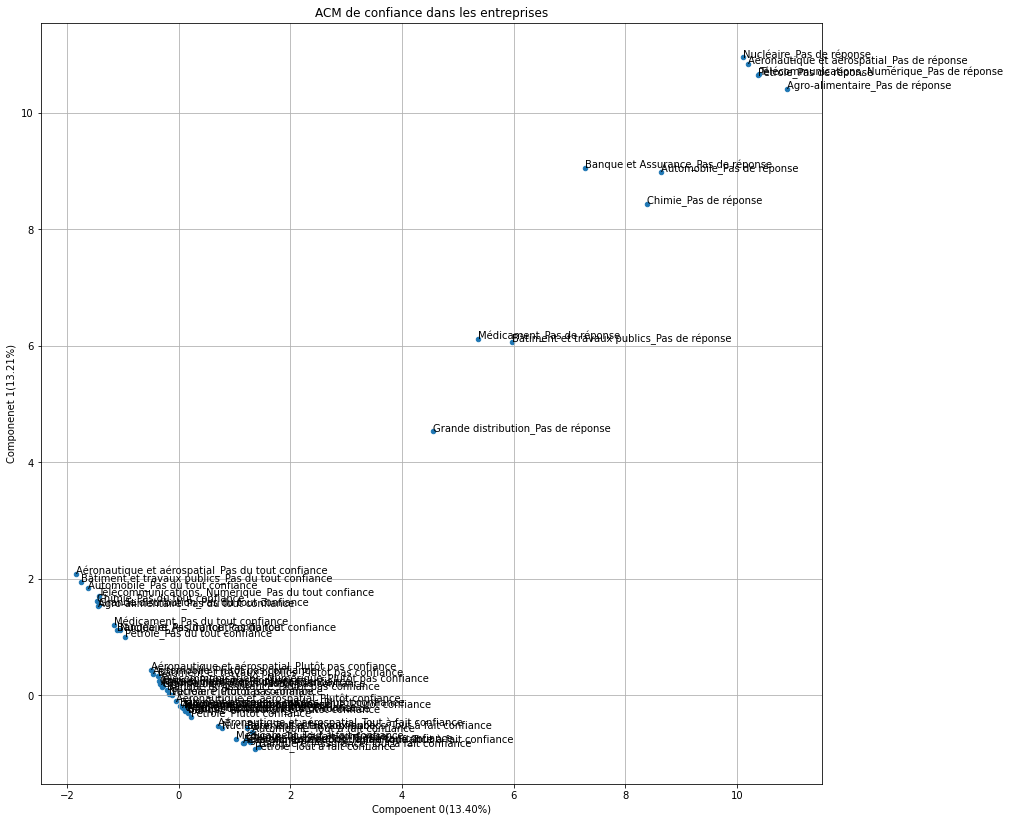

In [279]:
#ACM Items Ent

#create scatter plot 
plt.rcParams['figure.figsize'] = [14, 14]
x= acm_Ent['Compoenent 0(13.40%)']
y= acm_Ent['Componenet 1(13.21%)']
ax = acm_Ent.plot(kind='scatter', x='Compoenent 0(13.40%)', y='Componenet 1(13.21%)')
plt.grid()

#label each point in scatter plot
annotations = acm_Ent['Variable'] 
for i, label in enumerate(annotations):
    plt.text(x[i], y[i],label)

plt.title("ACM de confiance dans les entreprises")    